In [1]:
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd
import numpy as np
import html5lib
import requests
from openpyxl import Workbook
from datetime import datetime
import webbrowser
import os

In [2]:
path = '../process_tables_GBDC_Investment.xlsx'
xls = pd.ExcelFile(path)
all_sheets = pd.read_excel(path, sheet_name=None)

In [3]:
dataframes = {}
# Loop through each sheet and create a DataFrame in the dictionary
for sheet_name, sheet_df in all_sheets.items():
    dataframes[sheet_name.replace(' ', '_')] = sheet_df
    print(f"DataFrame name: {sheet_name} : {sheet_df.shape}")

DataFrame name: March_31_2013 : (370, 10)
DataFrame name: June_30_2013 : (370, 14)
DataFrame name: September_30_2013 : (386, 10)
DataFrame name: December_31_2013 : (382, 14)
DataFrame name: March_31_2014 : (403, 12)
DataFrame name: June_30_2014 : (416, 12)
DataFrame name: September_30_2014 : (436, 10)
DataFrame name: December_31_2014 : (434, 12)
DataFrame name: March_31_2015 : (449, 10)
DataFrame name: June_30_2015 : (477, 10)
DataFrame name: September_30_2015 : (487, 10)
DataFrame name: December_31_2015 : (430, 15)
DataFrame name: March_31_2016 : (515, 11)
DataFrame name: June_30_2016 : (479, 10)
DataFrame name: September_30_2016 : (592, 13)
DataFrame name: December_31_2016 : (587, 15)
DataFrame name: March_31_2017 : (614, 16)
DataFrame name: June_30_2017 : (640, 15)
DataFrame name: December_31_2017 : (671, 17)
DataFrame name: March_31_2018 : (707, 17)
DataFrame name: June_30_2018 : (745, 16)
DataFrame name: September_30_2018 : (786, 16)
DataFrame name: December_31_2018 : (849, 13)
Da

In [4]:
for dataframe in dataframes:
    # print(dataframe, ':',
    #       dataframes[dataframe].loc[dataframes[dataframe].shape[0]-1][0])
    if dataframes[dataframe].shape[0]-1 < 250:
        print(
            dataframe, ':', dataframes[dataframe].shape[0]-1)

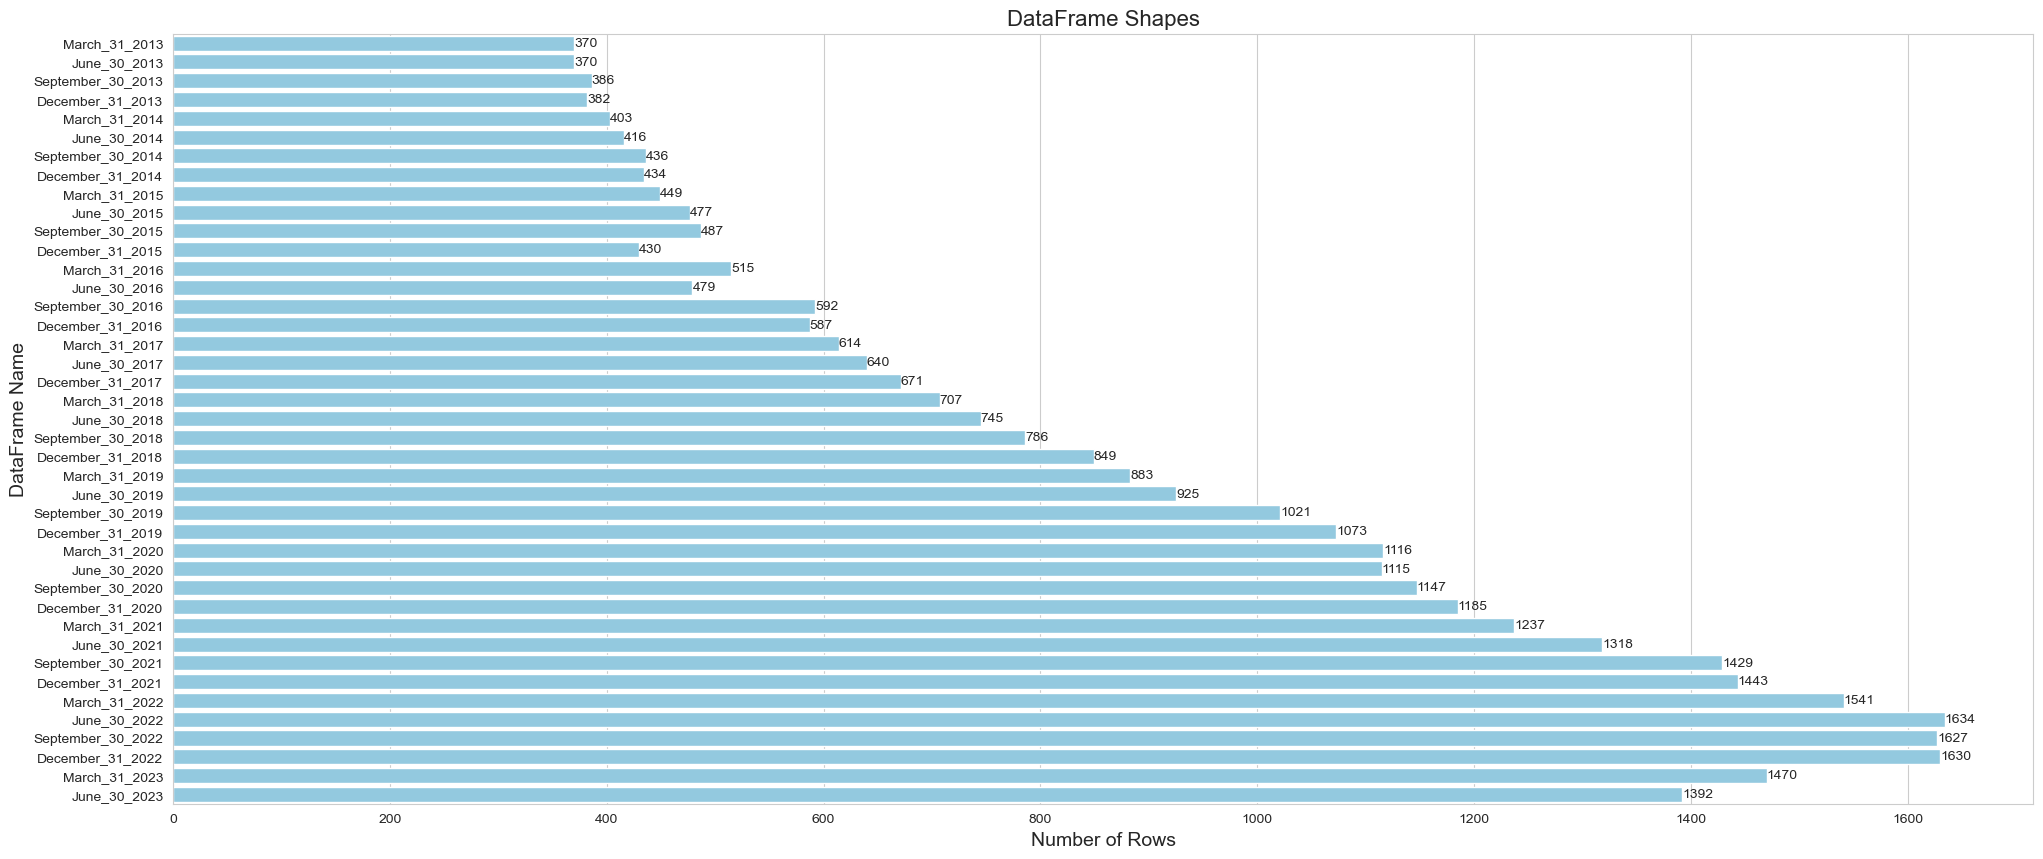

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataframes = {}
# Loop through each sheet and create a DataFrame in the dictionary
for sheet_name, sheet_df in all_sheets.items():
    dataframes[sheet_name.replace(' ', '_')] = sheet_df

# Extract DataFrame names and shapes
df_names = []
df_shapes = []
for sheet_name, sheet_df in dataframes.items():
    df_names.append(sheet_name)
    df_shapes.append(sheet_df.shape)

# Create a bar graph with Seaborn
plt.figure(figsize=(24, 10))
sns.set_style("whitegrid")

# Create a Seaborn barplot
sns.barplot(x=[shape[0] for shape in df_shapes], y=df_names, palette=[
    'red' if shape[0] < 250 else 'skyblue' for shape in df_shapes])

# Customize the appearance of bars
for i, shape in enumerate(df_shapes):
    width = shape[0]
    plt.text(width, i, f'{int(width)}', ha='left', va='center')

# Adjust font size
plt.xlabel('Number of Rows', fontsize=14)
plt.ylabel('DataFrame Name', fontsize=14)
plt.title('DataFrame Shapes', fontsize=16)

plt.show()

In [6]:
def process_table_fun(soi_table_df, process_tables_shapes):
    print(1, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.replace(r'^\s*\$\s*$', np.nan, regex=True)
    print(2, 'shape:', soi_table_df.shape)
    # fewer non-null values, effectively dropping rows with more than 100 non-null values.
    for index, row in soi_table_df.iterrows():
        if row.count() > 100:
            soi_table_df = soi_table_df.drop(index)
    print(0, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.dropna(how='all', axis=1)
    print(3, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.dropna(how='all', axis=0)
    print(4, 'shape:', soi_table_df.shape)
    soi_table_df.dropna()
    print(5, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.rename(
        columns=soi_table_df.iloc[0]).drop(soi_table_df.index[0])
    print(6, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.replace('—', 0, regex=False)
    print(7, 'shape:', soi_table_df.shape)
    process_tables_shapes.append(soi_table_df.shape)
    return soi_table_df


# df = dataframes['June_30_2021']
# process_table = process_table_fun(df)
# process_table.to_csv("process_table.csv")
# process_table

In [7]:
# for _ in range(len(process_table.columns)):
#     print(process_table.iloc[:, _].unique())

In [8]:
process_tables = {}
process_tables_shape = []
for dataframe in dataframes:
    print(dataframe)
    process_tables[dataframe] = process_table_fun(
        dataframes[dataframe], process_tables_shape)
    print('\n')

March_31_2013
1 shape: (370, 10)
2 shape: (370, 10)
0 shape: (370, 10)
3 shape: (370, 10)
4 shape: (370, 10)
5 shape: (370, 10)
6 shape: (369, 10)
7 shape: (369, 10)


June_30_2013
1 shape: (370, 14)
2 shape: (370, 14)
0 shape: (370, 14)
3 shape: (370, 14)
4 shape: (370, 14)
5 shape: (370, 14)
6 shape: (369, 14)
7 shape: (369, 14)


September_30_2013
1 shape: (386, 10)
2 shape: (386, 10)
0 shape: (386, 10)
3 shape: (386, 10)
4 shape: (386, 10)
5 shape: (386, 10)
6 shape: (385, 10)
7 shape: (385, 10)


December_31_2013
1 shape: (382, 14)
2 shape: (382, 14)
0 shape: (382, 14)
3 shape: (382, 14)
4 shape: (382, 14)
5 shape: (382, 14)
6 shape: (381, 14)
7 shape: (381, 14)


March_31_2014
1 shape: (403, 12)
2 shape: (403, 12)
0 shape: (403, 12)
3 shape: (403, 12)
4 shape: (403, 12)
5 shape: (403, 12)
6 shape: (402, 12)
7 shape: (402, 12)


June_30_2014
1 shape: (416, 12)
2 shape: (416, 12)
0 shape: (416, 12)
3 shape: (416, 12)
4 shape: (416, 12)
5 shape: (416, 12)
6 shape: (415, 12)
7 shape:

In [9]:
df = (process_tables['September_30_2015'])
df = dataframes['September_30_2015']
df.to_csv('test.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       487 non-null    object 
 1   1       422 non-null    object 
 2   2       305 non-null    object 
 3   3       214 non-null    object 
 4   4       426 non-null    object 
 5   5       426 non-null    object 
 6   6       425 non-null    object 
 7   7       426 non-null    object 
 8   8       313 non-null    float64
 9   9       298 non-null    object 
dtypes: float64(1), object(9)
memory usage: 38.2+ KB


In [11]:
# for _ in range(len(df.columns)):
#     print('')
#     print(df.iloc[:, _].unique())

In [12]:
x = [1, 2, 2, 34, 23, 23, 4, 45, 24, 3, 34, 3]
y = [2, 2, 3, 34, 21, 44, 5, 65, 34, 3, 23, 4]

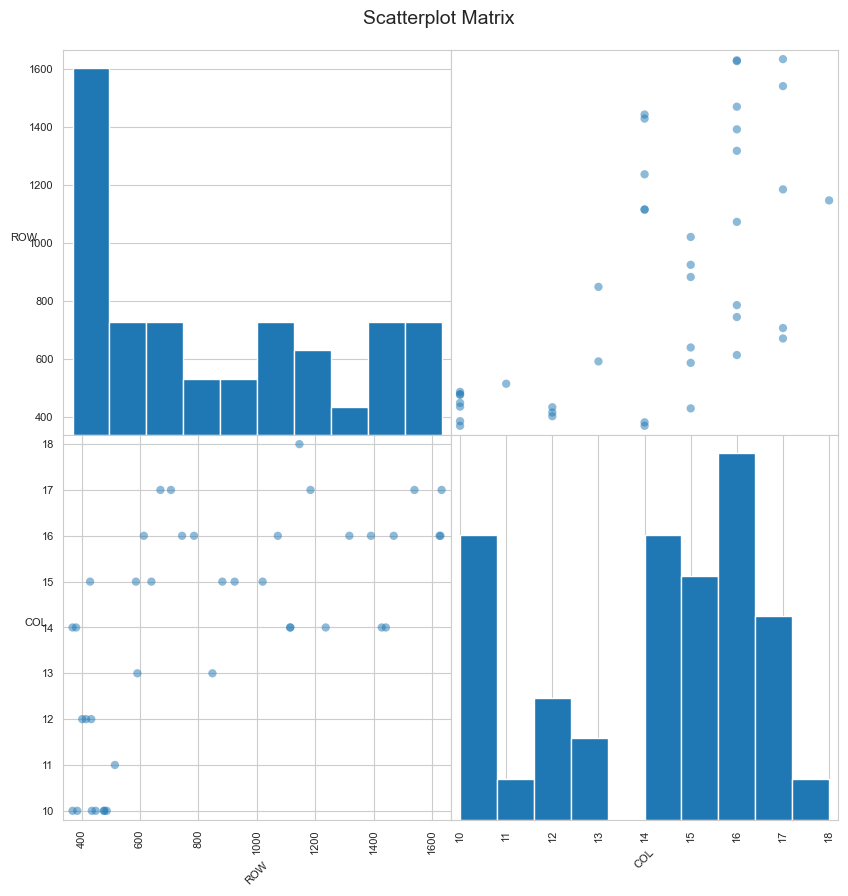

In [13]:
data = pd.DataFrame(process_tables_shape, columns=["ROW", "COL"])
scatter_matrix = pd.plotting.scatter_matrix(
    data, alpha=0.5, figsize=(10, 10), diagonal='hist', marker='o')

# Add labels to the subplots
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8, rotation=0)

plt.suptitle('Scatterplot Matrix', y=0.92, fontsize=14)

plt.show()

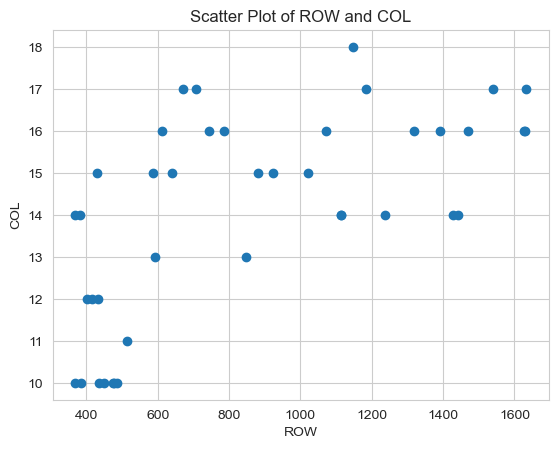

In [14]:
x = [point[0] for point in process_tables_shape]
y = [point[1] for point in process_tables_shape]

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('ROW')
plt.ylabel('COL')
plt.title('Scatter Plot of ROW and COL')

# Show the plot
plt.show()